In [1]:
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

(4032, 3024, 3)


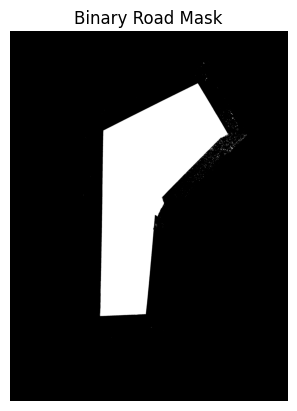

1


In [23]:
 
im = Image.open('image_test/472998467_1428387818123182_3217043207253846016_n.jpg')
arr = np.array(im)



image = np.zeros((arr.shape))
if arr.shape[-1] != 3:
    arr = arr[:, :, :3]
print(arr.shape)

def transform_image(image : np.ndarray) -> np.ndarray:
    blue_lower = np.array([0, 0, 50])
    blue_upper = np.array([100, 100, 255])
    road_mask = np.all((image >= blue_lower) & (image <= blue_upper), axis=-1).astype(np.uint8)

    flood_filled = road_mask.copy()

    h, w = flood_filled.shape
    exterior_point = (0, 0)

    exterior_mask = cv2.floodFill(flood_filled, None, exterior_point, 1)[1]
    
    interior_mask = 1 - exterior_mask

    final_mask = (interior_mask == 1).astype(np.uint8)
    return final_mask

binary_matrix = transform_image(arr)

plt.imshow(binary_matrix, cmap='gray') 
plt.title('Binary Road Mask')
plt.axis('off')  
plt.show()
print('1')